# ML Models Using GPR and TRC SF 401

In [1]:
# Set working directory to access data
import os
os.chdir('Data')
os.getcwd()

'C:\\Users\\Marcus\\OMSA GATECH\\CSE6242\\Project - QR\\Data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sms

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regression
from sklearn.svm import SVR

In [3]:
# Global variables
FeatureFile = 'SF401OUT_V2.xlsx'
random_state = 1234 

In [4]:
# Read feature file
featureDF_all = pd.read_excel(FeatureFile)

# Drop rows with Nan
featureDF = featureDF_all.dropna()

#featureDF

## Initial Model Params

In [5]:
## The following columns are not included as features
# METRAGE = not a predictor of defect
# Start Km = not a predictor of defect
# End Km = not a predictor of defect
# SDTopLeft4 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# SDTopRight4 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# SDTwist104 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# SDTwist34 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# SDVersL4 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# SDVersR4 = the 4th (most recent) TRC data used as a predictor, so assume not available to train
# Combined1 = derived from other predictors (eg SDTwist3)
# Combined2 = derived from other predictors (eg SDTwist3)
# Combined3 = derived from other predictors (eg SDTwist3)
# Combined4 = response

## The following are predictors
# PVCLeft
# PVCCentre
# PVCRight
# LRILeft
# LRICentre
# LRIRight
# BTILeft
# BTICentre
# BTIRight
# MLILeft
# MLICentre
# MLIRight
# SMLILeft
# SMLICentre
# SMLIRight
# FDLLeft
# FDLCentre
# FDLRight
# CTQILeft
# CTQICentre
# CTQIRight
# BVMLeftVolume
# BVMLeftCategory
# BVMCentreVolume
# BVMCentreCategory
# BVMRightVolume
# BVMRightCategory
# SMI
# SDTopLeft1
# SDTopLeft2
# SDTopLeft3
# SDTopRight1
# SDTopRight2
# SDTopRight3
# SDTwist101
# SDTwist102
# SDTwist103
# SDTwist31
# SDTwist32
# SDTwist33
# SDVersL1
# SDVersL2
# SDVersL3
# SDVersR1
# SDVersR2
# SDVersR3

## Response variable
# Combined4 = response


In [6]:
# Create train and test datsets
test_proportion = 0.25
nSamples = featureDF.shape[0] # number of observations
non_features = ['METRAGE', 'Start Km', 'End Km', 'SDTopLeft4', 'SDTopRight4', 'Combined1','SDTwist104', 
                'SDTwist34','SDVersL4', 'SDVersR4', 'Combined1', 'Combined2', 'Combined3', 'Combined4']

indices = range(nSamples)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(featureDF, featureDF['Combined4'],
                            indices, test_size=test_proportion, random_state = random_state)

# Drop non-feature columns
X_train = X_train.drop(non_features, axis=1)
X_test = X_test.drop(non_features, axis=1)
nFeatures = X_train.shape[1] # number of features

# For use in cross validation - do not split training and test
X = featureDF.drop(non_features, axis=1)
y = featureDF['Combined4']

# Get mean of y_test for model assessment
y_test_mean = np.mean(y_test)

# Normalise features
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)

### Linear Regression 


#### Not Normalised

In [7]:
# Create linear regression model
LRmodel = LinearRegression(fit_intercept = True, normalize = False)
LRmodel.fit(X_train, y_train)

r2 = LRmodel.score(X_train, y_train)
print('Coefficient of determination:', round(r2,4))

# Generate predictions and assess accuracy
LR_pred = LRmodel.predict(X_test)
LRerrors = abs(LR_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
LRmape = 100 * (LRerrors / y_test)
LRaccuracy = 100 - np.mean(LRmape)
print('LR accuracy:', round(LRaccuracy, 2), '%.')

# Obtain coefficients
coeff_df = pd.DataFrame(LRmodel.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

Coefficient of determination: 0.8105
LR accuracy: 84.72 %.


,Coefficient
PVCLeft,0.000079
PVCCentre,-0.000229
PVCRight,-0.000280
LRILeft,-0.014777
LRICentre,0.026097
LRIRight,0.034725
BTILeft,-0.089233
BTICentre,0.068832
BTIRight,-0.006599
MLILeft,0.102366


#### Normalised

In [8]:
# Create linear regression model
LRmodel_scaled = LinearRegression(fit_intercept = True, normalize = True)
LRmodel_scaled.fit(X_train_scaled, y_train)

r2 = LRmodel_scaled.score(X_train_scaled, y_train)
print('LR coefficient of determination:', round(r2,4))

# Generate predictions and assess accuracy
LR_pred_scaled = LRmodel_scaled.predict(X_test_scaled)
LRerrors = abs(LR_pred_scaled - y_test)

# Calculate mean absolute percentage error (MAPE)
LRmape = 100 * (LRerrors / y_test)
LRaccuracy = 100 - np.mean(LRmape)
print('LR accuracy:', round(LRaccuracy, 2), '%.')

LR coefficient of determination: 0.8105
LR accuracy: 84.62 %.


#### Plot predicted vs. actual

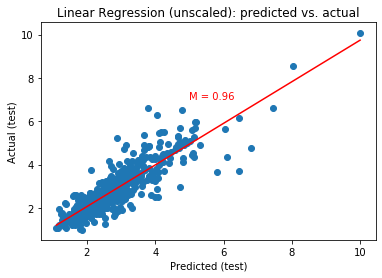

In [9]:
plt.scatter(LR_pred, y_test)
plt.title('Linear Regression (unscaled): predicted vs. actual', fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(LR_pred), np.poly1d(np.polyfit(LR_pred, y_test, 1))(np.unique(LR_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(LR_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

In [10]:
# Rerun using OLS to obtain P-values
X_train_features = sms.add_constant(X_train) # Ensure an intercept is provided
OLSmodel = sms.OLS(y_train, X_train)
OLSresults = OLSmodel.fit()
print(OLSresults.summary())

                                 OLS Regression Results                                
Dep. Variable:              Combined4   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              972.5
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                        0.00
Time:                        19:17:03   Log-Likelihood:                         -1161.8
No. Observations:                1433   AIC:                                      2416.
Df Residuals:                    1387   BIC:                                      2658.
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\users\marcus\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Cross validation score all features

In [46]:
# Cross Validation
k_folds = 10
LRmodel_scaled_CV = LinearRegression(fit_intercept = True, normalize = True)
LRmodel_scaled_CV.fit(X_scaled, y)

LRscores = cross_val_score(LRmodel_scaled_CV, X=X_scaled, y=y, cv=k_folds)
print('LR',k_folds,'fold CV average score:', round(np.mean(LRscores)*100,2),'%')

LR 10 fold CV average score: 63.77 %


#### Cross validation score reduced features

In [43]:
# Cross Validation
k_folds = 10
LRmodel_scaled_CV_16 = LinearRegression(fit_intercept = True, normalize = True)
LRmodel_scaled_CV_16.fit(X_scaled_16, y)

LRscores = cross_val_score(LRmodel_scaled_CV_16, X=X_scaled_16, y=y, cv=k_folds)
print('LR',k_folds,'fold CV average score:', round(np.mean(LRscores)*100,2),'%')

LR 10 fold CV average score: 63.02 %


#### LASSO

In [12]:
# Vary alpha to optimise LASSO NB alpha=0 = OLS
alpha_array = [1e-6, 1e-5, 0.0001, 0.01, 0.1, 0.5, 1.0, 5.0, 10, 50, 100]
LASSO_array = [] # array will store alpha, test accuracy, test score and # params

for alpha_iter in alpha_array:
    print('\nalpha:', alpha_iter)
    
    # Create LASSO model
    LASSOmodel = linear_model.Lasso(alpha=alpha_iter, max_iter=10e5)
    LASSOmodel.fit(X_train, y_train)
    LASSOtrain_score = LASSOmodel.score(X_train, y_train)

    # Generate predictions and assess accuracy
    LASSO_pred = LASSOmodel.predict(X_test)
    LASSOerrors = abs(LASSO_pred - y_test)

    # Calculate mean absolute percentage error (MAPE)
    LASSOmape = 100 * (LASSOerrors / y_test)
    LASSOaccuracy = 100 - np.mean(LASSOmape)
    print('LASSO accuracy:', round(LASSOaccuracy, 2), '%.')

    # Obtain test score
    LASSOtest_score = LASSOmodel.score(X_test, y_test)
    LASSOcoeff_used = np.sum(LASSOmodel.coef_!=0)
    print('LASSO test score:', round(LASSOtest_score, 3))
    print('LASSO coefficients used:', LASSOcoeff_used)
    LASSO_array.append([alpha_iter, LASSOaccuracy, LASSOtest_score, LASSOcoeff_used])

LASSO_array = np.asarray(LASSO_array)    


alpha: 1e-06
LASSO accuracy: 84.72 %.
LASSO test score: 0.753
LASSO coefficients used: 46

alpha: 1e-05
LASSO accuracy: 84.72 %.
LASSO test score: 0.753
LASSO coefficients used: 46

alpha: 0.0001
LASSO accuracy: 84.73 %.
LASSO test score: 0.754
LASSO coefficients used: 46

alpha: 0.01
LASSO accuracy: 84.99 %.
LASSO test score: 0.75
LASSO coefficients used: 28

alpha: 0.1
LASSO accuracy: 83.38 %.
LASSO test score: 0.724
LASSO coefficients used: 12

alpha: 0.5
LASSO accuracy: 71.87 %.
LASSO test score: 0.376
LASSO coefficients used: 5

alpha: 1.0
LASSO accuracy: 65.09 %.
LASSO test score: 0.052
LASSO coefficients used: 3

alpha: 5.0
LASSO accuracy: 65.08 %.
LASSO test score: 0.049
LASSO coefficients used: 3

alpha: 10
LASSO accuracy: 65.04 %.
LASSO test score: 0.048
LASSO coefficients used: 2

alpha: 50
LASSO accuracy: 64.46 %.
LASSO test score: 0.021
LASSO coefficients used: 1

alpha: 100
LASSO accuracy: 64.19 %.
LASSO test score: -0.0
LASSO coefficients used: 0


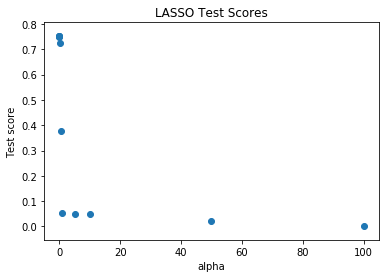

In [13]:
# Plot alpha vs test scores
plt.scatter(LASSO_array[:,0], LASSO_array[:,2])
plt.title('LASSO Test Scores', fontsize=12)
plt.xlabel('alpha', fontsize=10)
plt.ylabel('Test score', fontsize=10)
plt.show()

In [14]:
# Consider optimal alpha as test accuracy x test score
LASSO_optimal_index = np.where(LASSO_array[:,1]*LASSO_array[:,2] ==np.max(LASSO_array[:,1]*LASSO_array[:,2]))[0][0]
LASSO_optimal_alpha = LASSO_array[LASSO_optimal_index, 0]
print('Optimal alpha based on test accuracy and score:',LASSO_optimal_alpha)

# Consider optimal alpha as test accuracy x test score / # coefficients
LASSO_min_score = 0.6 # minimum test score to qualify
LASSO_min_coef = 6 # minimum number of coefficients
LASSO_best_score = 0 # Initialise score
for LASSO_iter in range(LASSO_array.shape[0]):
        if ((LASSO_array[LASSO_iter, 2] >= LASSO_min_score) & (LASSO_array[LASSO_iter, 3] >= LASSO_min_coef)):
            LASSO_working = LASSO_array[LASSO_iter,1]*LASSO_array[LASSO_iter,2]/LASSO_array[LASSO_iter,3] 
            if (LASSO_working > LASSO_best_score):
                LASSO_best_score = LASSO_working
                LASSO_best_alpha = LASSO_array[LASSO_iter,0]
print('Optimal alpha based on test accuracy and #coefficents:',LASSO_best_alpha)

Optimal alpha based on test accuracy and score: 0.0001
Optimal alpha based on test accuracy and #coefficents: 0.1


In [15]:
# Investigate coefficients
# Using highest test score and test accuracy
LASSOmodel = linear_model.Lasso(alpha=LASSO_optimal_alpha, max_iter=10e5)
LASSOmodel.fit(X_train, y_train)
print('LASSO coefficients with alpha:', LASSO_optimal_alpha)
LASSOcoeff_used = np.sum(LASSOmodel.coef_!=0)
print('LASSO coefficients used:', LASSOcoeff_used)
print(pd.DataFrame(LASSOmodel.coef_, X_train.columns, columns=['Coefficient']))

# Generate predictions and assess accuracy
LASSO_pred = LASSOmodel.predict(X_test)


LASSO coefficients with alpha: 0.0001
LASSO coefficients used: 46
                   Coefficient
PVCLeft               0.000079
PVCCentre            -0.000230
PVCRight             -0.000278
LRILeft              -0.013640
LRICentre             0.025961
LRIRight              0.033677
BTILeft              -0.087470
BTICentre             0.067161
BTIRight             -0.007119
MLILeft               0.100063
MLICentre            -0.116828
MLIRight             -0.002045
SMLILeft             -0.056601
SMLICentre            0.094775
SMLIRight            -0.005740
FDLLeft               0.005595
FDLCentre             0.109849
FDLRight              0.060332
CTQILeft             -0.002944
CTQICentre           -0.098075
CTQIRight             0.113194
BVMLeftVolume         0.026605
BVMLeftCategory       0.072191
BVMCentreVolume      -0.015633
BVMCentreCategory    -0.020625
BVMRightVolume        0.018973
BVMRightCategory      0.099655
SMI                  -0.013175
SDTopLeft1            0.076870
SDTo

#### Plot predicted vs. actual

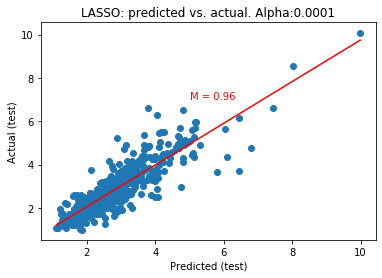

In [16]:
plt.scatter(LASSO_pred, y_test)
LASSO_title = 'LASSO: predicted vs. actual. Alpha:'+str(LASSO_optimal_alpha)
plt.title(LASSO_title, fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(LASSO_pred), np.poly1d(np.polyfit(LASSO_pred, y_test, 1))(np.unique(LASSO_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(LASSO_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

In [17]:
# Investigate coefficients
# Using highest test score and test accuracy / # coefficients
LASSOmodel = linear_model.Lasso(alpha=LASSO_best_alpha, max_iter=10e5)
LASSOmodel.fit(X_train, y_train)
print('\nLASSO coefficients with alpha:', LASSO_best_alpha)
LASSOcoeff_used = np.sum(LASSOmodel.coef_!=0)
print('LASSO coefficients used:', LASSOcoeff_used)
print(pd.DataFrame(LASSOmodel.coef_, X_train.columns, columns=['Coefficient']))

# Generate predictions and assess accuracy
LASSO_pred = LASSOmodel.predict(X_test)



LASSO coefficients with alpha: 0.1
LASSO coefficients used: 12
                   Coefficient
PVCLeft               0.000079
PVCCentre            -0.000265
PVCRight             -0.000122
LRILeft               0.000000
LRICentre             0.000000
LRIRight             -0.000000
BTILeft              -0.000000
BTICentre            -0.000000
BTIRight             -0.000000
MLILeft               0.000000
MLICentre            -0.000000
MLIRight             -0.000000
SMLILeft             -0.000000
SMLICentre            0.000000
SMLIRight            -0.000000
FDLLeft              -0.000000
FDLCentre             0.000000
FDLRight             -0.000000
CTQILeft              0.000000
CTQICentre           -0.000000
CTQIRight             0.000000
BVMLeftVolume         0.000000
BVMLeftCategory       0.000000
BVMCentreVolume      -0.000000
BVMCentreCategory    -0.000000
BVMRightVolume        0.000000
BVMRightCategory      0.000000
SMI                   0.000000
SDTopLeft1            0.037849
SDTopL

#### Plot predicted vs. actual

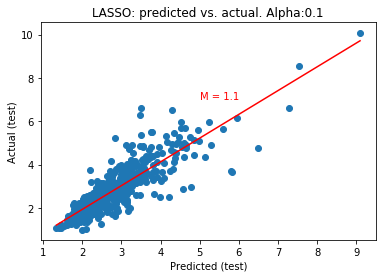

In [18]:
plt.scatter(LASSO_pred, y_test)
LASSO_title = 'LASSO: predicted vs. actual. Alpha:'+str(LASSO_best_alpha)
plt.title(LASSO_title, fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(LASSO_pred), np.poly1d(np.polyfit(LASSO_pred, y_test, 1))(np.unique(LASSO_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(LASSO_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

In [19]:
# Investigate coefficients
# Using alpha = 0.01
LASSOmodel = linear_model.Lasso(alpha=0.01, max_iter=10e5)
LASSOmodel.fit(X_train, y_train)
print('\nLASSO coefficients with alpha:', LASSO_best_alpha)
LASSOcoeff_used = np.sum(LASSOmodel.coef_!=0)
print('LASSO coefficients used:', LASSOcoeff_used)
print(pd.DataFrame(LASSOmodel.coef_, X_train.columns, columns=['Coefficient']))


# Generate predictions and assess accuracy
LASSO_pred = LASSOmodel.predict(X_test)


LASSO coefficients with alpha: 0.1
LASSO coefficients used: 28
                   Coefficient
PVCLeft               0.000078
PVCCentre            -0.000298
PVCRight             -0.000170
LRILeft               0.000000
LRICentre             0.005900
LRIRight              0.007718
BTILeft              -0.002158
BTICentre            -0.000000
BTIRight             -0.000000
MLILeft               0.008815
MLICentre            -0.013559
MLIRight              0.000000
SMLILeft             -0.025651
SMLICentre            0.080177
SMLIRight            -0.000000
FDLLeft               0.000000
FDLCentre             0.086816
FDLRight              0.000000
CTQILeft              0.000000
CTQICentre           -0.062342
CTQIRight             0.067741
BVMLeftVolume         0.019539
BVMLeftCategory       0.076157
BVMCentreVolume      -0.000000
BVMCentreCategory    -0.000000
BVMRightVolume        0.007406
BVMRightCategory      0.078067
SMI                  -0.000000
SDTopLeft1            0.090009
SDTopL

#### Plot pedicted vs. actual

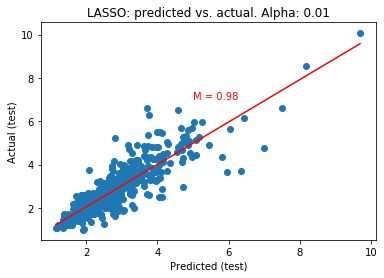

In [20]:
plt.scatter(LASSO_pred, y_test)
LASSO_title = 'LASSO: predicted vs. actual. Alpha: 0.01'
plt.title(LASSO_title, fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(LASSO_pred), np.poly1d(np.polyfit(LASSO_pred, y_test, 1))(np.unique(LASSO_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(LASSO_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

#### Create subset of features based on LASSO

In [24]:
# Highly reduced based on optimal alpha
# Retained some features where there was a corresponding Right/Left
LASSO_drop_features_16 = ['LRILeft', 'LRICentre', 'LRIRight', 'BTILeft', 'BTICentre', 'BTIRight',
                          'MLILeft', 'MLICentre', 'MLIRight', 'SMLILeft', 'SMLICentre', 'SMLIRight',
                          'BVMCentreVolume', 'BVMCentreCategory', 'SMI', 'SDTwist101', 'SDTwist102', 
                          'FDLLeft', 'FDLCentre', 'FDLRight', 'CTQILeft', 'CTQICentre', 'CTQIRight',
                          'BVMLeftVolume', 'BVMLeftCategory', 'BVMCentreVolume', 'BVMCentreCategory',
                          'BVMRightVolume', 'BVMRightCategory', 'SMI', 'SDTwist101', 'SDTwist102', 
                          'SDTwist31','SDVersL1', 'SDVersR1']
X_train_16 = X_train.drop(LASSO_drop_features_16, axis=1) 
X_test_16 = X_test.drop(LASSO_drop_features_16, axis=1) 
X_16 = X.drop(LASSO_drop_features_16, axis=1) 
X_train_scaled_16 = X_train_scaled.drop(LASSO_drop_features_16, axis=1) 
X_test_scaled_16 = X_test_scaled.drop(LASSO_drop_features_16, axis=1) 
X_scaled_16 = X_scaled.drop(LASSO_drop_features_16, axis=1) 

In [25]:
# Slightly reduced based on balance between performance and retaining features
LASSO_drop_features_38 = ['BVMCentreVolume', 'BVMCentreCategory', 'SMI', 'SDTwist101', 'SDTwist102', 
                          'SDTwist31', 'SDVersL1', 'SDVersR1']
X_train_38 = X_train.drop(LASSO_drop_features_38, axis=1) 
X_test_38 = X_test.drop(LASSO_drop_features_38, axis=1) 
X_38 = X.drop(LASSO_drop_features_38, axis=1) 
X_train_scaled_38 = X_train_scaled.drop(LASSO_drop_features_38, axis=1) 
X_test_scaled_38 = X_test_scaled.drop(LASSO_drop_features_38, axis=1) 
X_scaled_38 = X_scaled.drop(LASSO_drop_features_38, axis=1) 

#### Elastic Net

In [26]:
ENmodel = linear_model.ElasticNet(random_state = random_state)
ENmodel.fit(X_train, y_train) 
ENsearch = GridSearchCV(estimator=ENmodel, 
                        param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                        scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
ENsearch.fit(X_train, y_train)
print('Optimal Elastic Net paramaters:', ENsearch.best_params_)

Optimal Elastic Net paramaters: {'alpha': 0.01, 'l1_ratio': 0.2}


In [27]:
# Refit using optimal paramaters
EN_optimal_alpha = ENsearch.best_params_['alpha']
EN_optimal_l1_ratio = ENsearch.best_params_['l1_ratio']
ENmodel = linear_model.ElasticNet(alpha=EN_optimal_alpha, l1_ratio=EN_optimal_l1_ratio, random_state = random_state)
ENmodel.fit(X_train, y_train) 

# Generate predictions and assess accuracy
EN_pred =ENmodel.predict(X_test)
ENerrors = abs(EN_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
ENmape = 100 * (ENerrors / y_test)
ENaccuracy = 100 - np.mean(ENmape)
print('Elastic Net accuracy:', round(ENaccuracy, 2), '%.')

# Obtain test score
ENtest_score = ENmodel.score(X_test, y_test)
ENcoeff_used = np.sum(ENmodel.coef_!=0)
print('Elastic Net test score:', round(ENtest_score, 3))
print('Elastic Net coefficients used:', ENcoeff_used)

# Investigate coefficients used
print('\nElastic Net coefficients with alpha:', EN_optimal_alpha, 'and L1 ratio:', EN_optimal_l1_ratio)
print(pd.DataFrame(ENmodel.coef_, X_train.columns, columns=['Coefficient']))


Elastic Net accuracy: 84.84 %.
Elastic Net test score: 0.753
Elastic Net coefficients used: 37

Elastic Net coefficients with alpha: 0.01 and L1 ratio: 0.2
                   Coefficient
PVCLeft               0.000089
PVCCentre            -0.000247
PVCRight             -0.000241
LRILeft              -0.000000
LRICentre             0.020092
LRIRight              0.024266
BTILeft              -0.059212
BTICentre             0.029813
BTIRight             -0.005748
MLILeft               0.064081
MLICentre            -0.073111
MLIRight              0.000000
SMLILeft             -0.052045
SMLICentre            0.092748
SMLIRight            -0.000000
FDLLeft               0.002893
FDLCentre             0.103140
FDLRight              0.037452
CTQILeft              0.000000
CTQICentre           -0.096023
CTQIRight             0.098852
BVMLeftVolume         0.024527
BVMLeftCategory       0.072384
BVMCentreVolume      -0.000000
BVMCentreCategory    -0.000000
BVMRightVolume        0.014993
BVMRigh

#### Plot predicted vs. actual

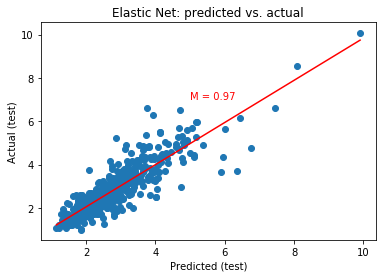

In [28]:
plt.scatter(EN_pred, y_test)
plt.title('Elastic Net: predicted vs. actual', fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(EN_pred), np.poly1d(np.polyfit(EN_pred, y_test, 1))(np.unique(EN_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(EN_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

## Linear Regression with reduced features

#### Reduced features: 16

In [29]:
# Create linear regression model
LRmodel_scaled_16 = LinearRegression(fit_intercept = True, normalize = True)
LRmodel_scaled_16.fit(X_train_scaled_16, y_train)

r2 = LRmodel_scaled_16.score(X_train_scaled_16, y_train)
print('LR coefficient of determination (features=', X_16.shape[1],')',round(r2,4))

# Generate predictions and assess accuracy
LR_pred_scaled_16 = LRmodel_scaled_16.predict(X_test_scaled_16)
LRerrors = abs(LR_pred_scaled_16 - y_test)

# Calculate mean absolute percentage error (MAPE)
LRmape = 100 * (LRerrors / y_test)
LRaccuracy = 100 - np.mean(LRmape)
print('LR accuracy:', round(LRaccuracy, 2), '%.')

LR coefficient of determination (features= 16 ) 0.7868
LR accuracy: 84.57 %.


#### Reduced features: 38

In [30]:
# Create linear regression model
LRmodel_scaled_38 = LinearRegression(fit_intercept = True, normalize = True)
LRmodel_scaled_38.fit(X_train_scaled_38, y_train)

r2 = LRmodel_scaled_38.score(X_train_scaled_38, y_train)
print('LR coefficient of determination (features=', X_38.shape[1],')',round(r2,4))

# Generate predictions and assess accuracy
LR_pred_scaled_38 = LRmodel_scaled_38.predict(X_test_scaled_38)
LRerrors = abs(LR_pred_scaled_38 - y_test)

# Calculate mean absolute percentage error (MAPE)
LRmape = 100 * (LRerrors / y_test)
LRaccuracy = 100 - np.mean(LRmape)
print('LR accuracy:', round(LRaccuracy, 2), '%.')

LR coefficient of determination (features= 38 ) 0.8079
LR accuracy: 84.6 %.


### Random Forest Regression

#### Unscaled

In [31]:
num_trees = 1000
# Instantiate model with num_trees decision trees
RFmodel = RandomForestRegressor(n_estimators = num_trees, oob_score = True, random_state = random_state)

# Train the model on training data
RFmodel.fit(X_train, y_train)

# Generate predictions to assess performance
RF_pred = RFmodel.predict(X_test)# Calculate the absolute errors
RFerrors = abs(RF_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
RFmape = 100 * (RFerrors / y_test)
RFaccuracy = 100 - np.mean(RFmape)
print('RF accuracy (unscaled features):', round(RFaccuracy, 2), '%.')
RFtest_score = RFmodel.score(X_test, y_test)
print('RF test score:', round(RFtest_score, 3))
print('Out of bag score:', round(RFmodel.oob_score_,4))

RF accuracy (unscaled features): 87.38 %.
RF test score: 0.815
Out of bag score: 0.8373


#### Scaled

In [32]:
num_trees = 1000
# Instantiate model with num_trees decision trees
RFmodel = RandomForestRegressor(n_estimators = num_trees, oob_score = True, random_state = random_state)

# Train the model on training data
RFmodel.fit(X_train_scaled, y_train)

# Generate predictions to assess performance
RF_pred = RFmodel.predict(X_test_scaled)# Calculate the absolute errors
RFerrors = abs(RF_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
RFmape = 100 * (RFerrors / y_test)
RFaccuracy = 100 - np.mean(RFmape)
print('RF accuracy (scaled features):', round(RFaccuracy, 2), '%.')
RFtest_score = RFmodel.score(X_test_scaled, y_test)
print('RF test score:', round(RFtest_score, 3))
print('Out of bag score:', round(RFmodel.oob_score_,4))

RF accuracy (scaled features): 87.09 %.
RF test score: 0.813
Out of bag score: 0.8373


#### Cross validation score

In [33]:
# Cross Validation
num_trees = 1000
# Instantiate model with num_trees decision trees
RFmodel_CV = RandomForestRegressor(n_estimators = num_trees, oob_score = True, random_state = random_state)

# Train the model on training data
RFmodel_CV.fit(X_train, y_train)

k_folds = 10
RFscores = cross_val_score(RFmodel, X, y, cv=k_folds)
print('RF',k_folds,'fold CV average score:', round(np.mean(RFscores)*100,2),'%')

RF 10 fold CV average score: 61.26 %


#### Plot predicted and test

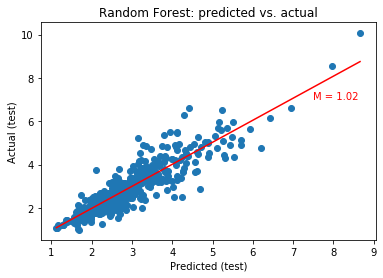

In [34]:
plt.scatter(RF_pred, y_test)
plt.title('Random Forest: predicted vs. actual', fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(RF_pred), np.poly1d(np.polyfit(RF_pred, y_test, 1))(np.unique(RF_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(RF_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(7.5,7,M_string, color='red')               
plt.show()

#### RF with reduced features

In [35]:
num_trees = 1000
# Instantiate model with num_trees decision trees
RFmodel_reduced = RandomForestRegressor(n_estimators = num_trees, oob_score = True, random_state = random_state)

# Train the model on training data
RFmodel_reduced.fit(X_train_16, y_train)

# Generate predictions to assess performance
RF_pred_reduced = RFmodel_reduced.predict(X_test_16)# Calculate the absolute errors
RFerrors = abs(RF_pred_reduced - y_test)

# Calculate mean absolute percentage error (MAPE)
RFmape = 100 * (RFerrors / y_test)
RFaccuracy = 100 - np.mean(RFmape)
print('RF accuracy (unscaled, reduced features):', round(RFaccuracy, 2), '%.')
RFtest_score = RFmodel_reduced.score(X_test_16, y_test)
print('RF test score:', round(RFtest_score, 3))
print('Out of bag score:', round(RFmodel_reduced.oob_score_,4))

RF accuracy (unscaled, reduced features): 86.73 %.
RF test score: 0.802
Out of bag score: 0.8202


### Support Vector Regression

#### RBF Kernel

In [36]:
# Vary C to optimise SVR NB C=0 = no penalty
C_array = [0.01, 0.1, 1.0, 10, 100, 1000]
SVR_array = [] # array will store C, test accuracy and test score

for C_iter in C_array:
    print('\nC:', C_iter)

    SVRmodel = SVR(C=C_iter, kernel='rbf', gamma='auto', epsilon=0.01)
    SVRmodel.fit(X_train_scaled,y_train)

    # Generate predictions to assess performance
    SVR_pred = SVRmodel.predict(X_test_scaled)# Calculate the absolute errors
    SVRerrors = abs(SVR_pred - y_test)

    # Calculate mean absolute percentage error (MAPE)
    SVRmape = 100 * (SVRerrors / y_test)
    SVRaccuracy = 100 - np.mean(SVRmape)
    print('SVR accuracy:', round(SVRaccuracy, 2), '%.')
    SVRtest_score = SVRmodel.score(X_test_scaled, y_test)
    print('SVR test score:', round(SVRtest_score, 3))
    SVR_array.append([C_iter, SVRaccuracy, SVRtest_score])

SVR_array = np.asarray(SVR_array)    


C: 0.01
SVR accuracy: 75.57 %.
SVR test score: 0.273

C: 0.1
SVR accuracy: 83.32 %.
SVR test score: 0.588

C: 1.0
SVR accuracy: 87.6 %.
SVR test score: 0.754

C: 10
SVR accuracy: 88.41 %.
SVR test score: 0.809

C: 100
SVR accuracy: 86.55 %.
SVR test score: 0.781

C: 1000
SVR accuracy: 86.42 %.
SVR test score: 0.777


In [37]:
# Refit using optimal params
SVR_best_C = 10
SVR_best_epsilon = 0.01

SVRmodel = SVR(C=SVR_best_C, kernel='rbf', gamma='auto', epsilon=SVR_best_epsilon)
SVRmodel.fit(X_train_scaled,y_train)

# Generate predictions to plot predicted and actuals
SVR_pred = SVRmodel.predict(X_test_scaled)

#### Plot predicted vs. actual

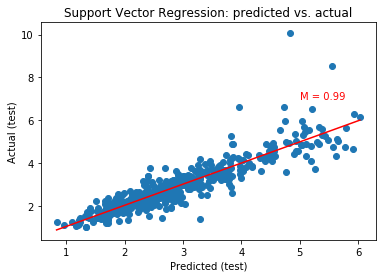

In [38]:
plt.scatter(SVR_pred, y_test)
plt.title('Support Vector Regression: predicted vs. actual', fontsize=12)
plt.xlabel('Predicted (test)', fontsize=10)
plt.ylabel('Actual (test)', fontsize=10)
# Plot line of best fit
plt.plot(np.unique(SVR_pred), np.poly1d(np.polyfit(SVR_pred, y_test, 1))(np.unique(SVR_pred)), color='red')
M_string = 'M = ' + str(round(np.poly1d(np.polyfit(SVR_pred, y_test, 1)).c[0],2)) # Extract gradient ~1.0
plt.text(5,7,M_string, color='red')               
plt.show()

#### Reduced features 16

In [39]:
# Refit using optimal params
SVR_best_C = 10
SVR_best_epsilon = 0.01

SVRmodel_reduced = SVR(C=SVR_best_C, kernel='rbf', gamma='auto', epsilon=SVR_best_epsilon)
SVRmodel_reduced.fit(X_train_scaled_16, y_train)

# Generate predictions to plot predicted and actuals
SVR_pred_reduced = SVRmodel_reduced.predict(X_test_scaled_16)
SVRerrors = abs(SVR_pred_reduced - y_test)

# Calculate mean absolute percentage error (MAPE)
SVRmape = 100 * (SVRerrors / y_test)
SVRaccuracy = 100 - np.mean(SVRmape)
print('SVR accuracy (features=', X_16.shape[1],'):', round(SVRaccuracy, 2), '%.')
SVRtest_score = SVRmodel_reduced.score(X_test_scaled_16, y_test)
print('SVR test score:', round(SVRtest_score, 3))

SVR accuracy (features= 16 ): 86.69 %.
SVR test score: 0.778


#### Reduced features 38

In [40]:
# Refit using optimal params
SVR_best_C = 10
SVR_best_epsilon = 0.01

SVRmodel_reduced = SVR(C=SVR_best_C, kernel='rbf', gamma='auto', epsilon=SVR_best_epsilon)
SVRmodel_reduced.fit(X_train_scaled_38, y_train)

# Generate predictions to plot predicted and actuals
SVR_pred_reduced = SVRmodel_reduced.predict(X_test_scaled_38)
SVRerrors = abs(SVR_pred_reduced - y_test)

# Calculate mean absolute percentage error (MAPE)
SVRmape = 100 * (SVRerrors / y_test)
SVRaccuracy = 100 - np.mean(SVRmape)
print('SVR accuracy (features=', X_38.shape[1],'):', round(SVRaccuracy, 2), '%.')
SVRtest_score = SVRmodel_reduced.score(X_test_scaled_38, y_test)
print('SVR test score:', round(SVRtest_score, 3))

SVR accuracy (features= 38 ): 88.14 %.
SVR test score: 0.802


#### Sigmoid Kernel

In [41]:
# Vary C to optimise SVR NB C=0 = no penalty
C_array = [0.01, 0.1, 1.0, 10, 100, 1000]
SVR_array = [] # array will store C, test accuracy and test score

for C_iter in C_array:
    print('\nC:', C_iter)

    SVRmodel = SVR(C=C_iter, kernel='sigmoid', gamma='auto', epsilon=0.01)
    SVRmodel.fit(X_train_scaled,y_train)

    # Generate predictions to assess performance
    SVR_pred = SVRmodel.predict(X_test_scaled)# Calculate the absolute errors
    SVRerrors = abs(SVR_pred - y_test)

    # Calculate mean absolute percentage error (MAPE)
    SVRmape = 100 * (SVRerrors / y_test)
    SVRaccuracy = 100 - np.mean(SVRmape)
    print('SVR accuracy:', round(SVRaccuracy, 2), '%.')
    SVRtest_score = SVRmodel.score(X_test_scaled, y_test)
    print('SVR test score:', round(SVRtest_score, 3))
    SVR_array.append([C_iter, SVRaccuracy, SVRtest_score])

SVR_array = np.asarray(SVR_array) 


C: 0.01
SVR accuracy: 80.64 %.
SVR test score: 0.594

C: 0.1
SVR accuracy: 77.85 %.
SVR test score: -0.193

C: 1.0
SVR accuracy: -60.35 %.
SVR test score: -180.0

C: 10
SVR accuracy: -1496.73 %.
SVR test score: -18649.935

C: 100
SVR accuracy: -15883.89 %.
SVR test score: -1868641.421

C: 1000
SVR accuracy: -159779.95 %.
SVR test score: -186895435.672


#### Polynomial Kernel

In [42]:
# Vary C to optimise SVR NB C=0 = no penalty
C_array = [0.01, 0.1, 1.0, 10, 100, 1000]
SVR_array = [] # array will store C, test accuracy and test score

for C_iter in C_array:
    print('\nC:', C_iter)

    SVRmodel = SVR(C=C_iter, kernel='poly', degree=3, gamma='auto', epsilon=0.1)
    SVRmodel.fit(X_train_scaled,y_train)

    # Generate predictions to assess performance
    SVR_pred = SVRmodel.predict(X_test_scaled)# Calculate the absolute errors
    SVRerrors = abs(SVR_pred - y_test)

    # Calculate mean absolute percentage error (MAPE)
    SVRmape = 100 * (SVRerrors / y_test)
    SVRaccuracy = 100 - np.mean(SVRmape)
    print('SVR accuracy:', round(SVRaccuracy, 2), '%.')
    SVRtest_score = SVRmodel.score(X_test_scaled, y_test)
    print('SVR test score:', round(SVRtest_score, 3))
    SVR_array.append([C_iter, SVRaccuracy, SVRtest_score])

SVR_array = np.asarray(SVR_array) 


C: 0.01
SVR accuracy: 73.26 %.
SVR test score: 0.323

C: 0.1
SVR accuracy: 79.01 %.
SVR test score: 0.467

C: 1.0
SVR accuracy: 83.89 %.
SVR test score: 0.513

C: 10
SVR accuracy: 83.35 %.
SVR test score: -0.593

C: 100
SVR accuracy: 80.44 %.
SVR test score: -2.144

C: 1000
SVR accuracy: 80.19 %.
SVR test score: -2.022
